# Student Details
* Guy Kabiri

# TL;DR
In this lab, we have learned the basics of deep learning with the `pyTorch` library.  
We have practiced convolution and pooling methods using `pyTorch` and the need to reshaping images before applying these actions.


# **Lab 5 - Introduction to Deep learning**
# **Computer Vision (10224)**
<img src='https://upload.wikimedia.org/wikipedia/he/thumb/9/94/%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg/560px-%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg'></img>	
## **Goals**
* Motivation to use nn frameworks such as pytorch, tensorflow etc.  


## **Lab Session**
1. what is pytorch
2. Basic Deep learning
  * Fully Connected layers 
  * Activation functions   
3. MNIST
  * Download the  MNIST Dataset
  * Initlaize a torchvision pre-defined MNIST dataset class
4. Single Fully connected model 
  * Build a model using single fully connected layer
  * Demo evaluation of the randomly initialized weights 
    * A little bit about torch.nn.fanctional 
    * A little bit about softmax activation function
5. Three FC-Layer model 
  * concatinate 3 FC layer with the following dimensions: 
    * FC-1: input: size of the image in pixels, output: 128
    * FC-2: input: 128, output: 64
    * FC-1: input: 64, output: number of classes to predict from ( in this case 10) 
6. Convolution layer
7. Pooling layer 
8. MNIST Model with convolution layers 
9. Class Exercise build LeNet Architectue:

<img src = "https://d2l.ai/_images/lenet.svg"></img> 



## **Final Report**
1. Complete the unfinished lab session tasks.
2. Write a short TL;DR (too long didn’t read) summary and describe your work and what you understood in the lab.

## **Guidelines**
1. Code written in the assignments MUST follow the PEP-8 guidelines, we will deduct points of code not following this guideline, points will be accumulated.
2. You may use either Google Colab or Local Jupyter notebook session.
3. Use Markdown cells in-between your code cells to explain what you’ve done.
4. Assignments must be submitted as .html with all the required plots.
Some exercises will require online reading, you may use Google and stackoverflow for inspiration, although if you use it make sure to attach the reference link. 
5. Add as much comments you need to explain yourself, you wouldn’t want to assume we fully understand your
intuition.
6. Code should be well ordered, formatted and readable.

## **Further Reading**:
[DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)





## Imports

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
# from google.colab import drive
import torch.nn.functional as F
import torchvision
%matplotlib inline

## What is PyTorch
**PyTorch is very similar to Numpy and is mostly used as a deep learning research platform that provides maximum flexibility and speed e.g.** 

```
# np.zeros == torch.zeros
```




**Let see some of the similarities**

In [34]:
shape = (3, 3, 3)

# initialize a zero array in numpy
zeros_np = np.zeros(shape)

# initialize a zero array in pytorch
zeros_torch = torch.zeros(shape)

# initialize a zero array in torch from numpy
zeros_torch_from_np = torch.from_numpy(zeros_np)

**Random numbers generator**

In [35]:
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# set random seed
torch.manual_seed(7)

# initialize a random numbers array in numpy
randn_np = np.random.randn(*(shape))

# initialize a random numbers array in pytorch
randn_torch = torch.randn(shape)

**Auto gradient**


In [36]:
x = np.arange(0, 10, 2, dtype=np.float32)
print('x:', x)

x_torch = torch.from_numpy(x)
print('x as troch:', x_torch)

x_torch = x_torch.cuda()                #   move to GPU, other possible options -> .to(device)
print('x as troch to cuda', x_torch)

x_torch.requires_grad = True

y = 2 * (x_torch**2)
print('y:', y)

z = y.sum()
print('z:', z)

print('------------')

# lets get the gradients.
z.backward()                #   back-propagation
print(x_torch.grad)

x: [0. 2. 4. 6. 8.]
x as troch: tensor([0., 2., 4., 6., 8.])
x as troch to cuda tensor([0., 2., 4., 6., 8.], device='cuda:0')
y: tensor([  0.,   8.,  32.,  72., 128.], device='cuda:0', grad_fn=<MulBackward0>)
z: tensor(240., device='cuda:0', grad_fn=<SumBackward0>)
------------
tensor([ 0.,  8., 16., 24., 32.], device='cuda:0')


**Torch to numpy**


In [37]:
# from torch to numpy
x_np = x_torch.detach().cpu().numpy()

**Using the GPU**

In [38]:
# First we check if we have a GPU which can use
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

# Now we move the tensor from the cpu to GPU
x_torch.to(device)

#Or we can use the otherway which is:

#x_torch.cuda() # this will throw and error if cuda device is not available

cuda


tensor([0., 2., 4., 6., 8.], device='cuda:0', requires_grad=True)

## Basic Deep learning!


### Fully-Connnected layer
$x_{in}*weights + biases$

**Shapes:**
$[Batch_{in}, featuresSize] * [featuresSize, OutSize] + [N] = [Batch_{in}, OutSize]$

In [39]:
# Old school low level fully connected layer
batch_size = 1 
features_size = 28
out_size = 2
x_input = torch.randn((batch_size, features_size)) 
weights = torch.randn((features_size, out_size)) # random init weights, never set weights to zero.
biases = torch.zeros(out_size) # set biases to zero

In [40]:
# just like the above formula
fc1 = torch.matmul(x_input, weights) + biases

In [41]:
# How we do it in PyTorch
our_first_model = nn.Sequential(
    nn.Linear(in_features=features_size, out_features=out_size, bias=True),
)
# Run it !
print(our_first_model(x_input))

tensor([[0.4492, 1.3131]], grad_fn=<AddmmBackward>)


In [42]:
#2
class Model(nn.Module):
    def __init__(self, features_size_in, out_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features=features_size_in,
                             out_features=out_size, bias=True)
    
    def forward(self, x):
        return self.fc1(x)
  

# Run it!
net = Model(features_size, out_size)
print(net(x_input))

tensor([[-0.7703, -0.8064]], grad_fn=<AddmmBackward>)


### Activation functions
**What are they good for? Breaking linearity !**

A linear function is just a polynomial of one degree. Now, a linear equation is easy to solve but they are limited in their complexity and have less power to learn complex functional mappings from data. A Neural Network without Activation function would simply be a Linear regression Model, which has limited power and does not performs good most of the times.

Our first activation! the common **ReLU** stands for rectified linear unit
it basicly does $max{(0, features)}$

In [43]:
# the Torch way!
relu1 = F.relu(fc1)
# the numpy way!
relu2 = np.maximum(0, fc1.numpy())

## MNIST Dataset 


### let's download the data 
!wget is used to download the data 

!tar is used to decompress the data 

In [44]:
#Download
!wget -O MNIST.tar.gz https://activeeon-public.s3.eu-west-2.amazonaws.com/datasets/MNIST.new.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-03-31 14:42:30--  https://activeeon-public.s3.eu-west-2.amazonaws.com/datasets/MNIST.new.tar.gz
Resolving activeeon-public.s3.eu-west-2.amazonaws.com (activeeon-public.s3.eu-west-2.amazonaws.com)... 52.95.149.66
Connecting to activeeon-public.s3.eu-west-2.amazonaws.com (activeeon-public.s3.eu-west-2.amazonaws.com)|52.95.149.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34812527 (33M) [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz        100%[===================>]  33.20M  14.5MB/s    in 2.3s    

2021-03-31 14:42:33 (14.5 MB/s) - ‘MNIST.tar.gz’ saved [34812527/34812527]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/processed/
MNIST/processed/test.pt
MNIST/processed/training.pt


### Load the data to the predefined torchvision MNIST Dataset class 

In [45]:
trainset = torchvision.datasets.MNIST(root='', train=False,
                                        download=False);
                                        
num_classes = len(trainset.classes)

#### Visualize one image

Text(0.5, 1.0, 'The number 4')

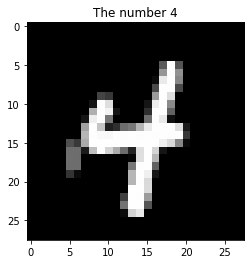

In [46]:
idx = np.random.randint(trainset.data.shape[0])
plt.imshow(trainset.data[idx].numpy(), cmap="gray")
plt.title(f'The number {trainset.targets[idx]}')

## Building a Model using a single FC - Fully-Connected layer!

In [47]:
class mnistModel(nn.Module):
    def __init__(self, features_size_in, out_size):
        super(mnistModel, self).__init__()
        self.fc1 = nn.Linear(in_features=features_size_in, out_features=out_size)
  
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        y = self.fc1(x)
        return y

get a random image from the dataset 

In [48]:
random_image = trainset.data[idx] / 255.

In [49]:
h, w = random_image.size()

 ### Initilize  our FC MNIST model 

In [50]:
mnist_model = mnistModel(h * w, num_classes)

#### Demo evaluation of the random initalized mnist fully connectem model.





explantion of some of the method which has been used: 

<code>numpy()</code> method is used to convert the tensor to numpy array please notice that it has to be on the cpu otherwise an error will be raised 

<code>cpu()</code> method is used to copy the tensor to the cpu

<code>torch.torch.nn.functional</code> allows us to use a nn function with out the need to pre- define it, it is common to use this module for small modification of a certion model output. 

<code>softmax()</code> applies the **softmax activation** function: 
softmax forces the sum of the prediction to be one and each prediction value to be between zero and one. Thus softmax repressent the probabilty of each class to be the corrent class in the input image. 

In [51]:
output = mnist_model(random_image[np.newaxis, :])
softmax_output = F.softmax(output, dim=-1)
output_np =  output.detach().cpu().numpy()

In [52]:
with torch.no_grad():
    output = mnist_model(random_image[np.newaxis, :])

let's review the result and different ways to print tensor 

<code>item()</code> method is used to extract the value of of a one element tensor.

<code>detach()</code> method is used to remove the gradient backwards path calculation 
 

In [53]:
print('model output:', output.detach().cpu().numpy())
print ('output with softmax',softmax_output.detach().cpu().numpy())
print('sum (no softmax):', output.detach().sum().item(),
      'sum (with softmax)',softmax_output.detach().sum().item())
print ('predicted digit (no softmax)', output.detach().argmax())
print ('predicted digit (with softmax)', softmax_output.detach().argmax())

model output: [[-0.2210427   0.03474067  0.00199922  0.00688845  0.28451496  0.38646334
   0.11638105  0.12998322 -0.16064893  0.29334995]]
output with softmax [[0.07221345 0.09326172 0.09025764 0.09070001 0.11972339 0.13257286
  0.10119507 0.10258096 0.07670908 0.12078583]]
sum (no softmax): 0.8726292848587036 sum (with softmax) 1.0
predicted digit (no softmax) tensor(5)
predicted digit (with softmax) tensor(5)


## Implement a 3 layer fully connected model:

the layers demtion should be as follows:

* for the first layer: output features of 128 
* for the second layer: output features of 64 
* for the third layer: the output features would be the number of classes to predict from, in this case 10.   


In [54]:
class mnistModel(nn.Module):
    def __init__(self):
        super(mnistModel, self).__init__()
        self.fc1 = nn.Linear(in_features=28 * 28, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        y = F.sigmoid(x)
        return y

## Convolution layer

**Works more like correlation then convolution.**
How does it  works? let us watch https://cs231n.github.io/convolutional-networks/

**Conv2d  in PyTorch**
Syntax : **nn.Conv2d(in_channels, out_channel, kernel_size, stride, padding)**
**Note: in PyTorch we work with tensor that has shape like [batch_size, Channels, H, W] so we have to transpose the channels into the right order before processing the data.**

Watch the example below:

In [55]:
input_image = random_image
print(input_image.shape) # shape of only H, W  which means we have to add two more channels
# batch_size if we only work with one image and the color channel.
# Mostly when working with RGB/BGR images we wont have to add extra channels
conv_ready_image = random_image[np.newaxis, np.newaxis, :] # we added one channel at the start and one after him
print(conv_ready_image.shape)

torch.Size([28, 28])
torch.Size([1, 1, 28, 28])


In [56]:
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), stride=1) # Create a conv2D layer

In [57]:
conv_res = conv1(conv_ready_image) # Run the conv2D layer on our input
print(conv_res.shape) # see how the new shapes, H and W are reduced by 2 and the channels changed to 3

torch.Size([1, 8, 26, 26])


## Pooling Layer
Syntax: **nn.MaxPool2d(kernel_size)**
This layer purpose is to reduce the spatial size, it is a sampling method.
There's a window with size kernel_size that picks the maximum number in that window.

In [58]:
pooling1 = nn.MaxPool2d(kernel_size=(2,2),stride=2)
pooling_res = pooling1(conv_res) #use the layer!
print(pooling_res.shape) # We reduced H and W by a factor of 2 from 26X26 to 13X13

torch.Size([1, 8, 13, 13])


## MNIST Model with conv layers 

In [59]:
# Quick and small conv2d based model
class mnistModelV2(nn.Module):
    def __init__(self):
        super(mnistModelV2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.fc1 = nn.Linear(in_features=13*13*8, out_features=10)
  
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = x.view(x.shape[0], -1)
        y = self.fc1(x)
        return y

In [60]:
mnist_v2 = mnistModelV2()

In [61]:
improved_mnist_res = mnist_v2(conv_ready_image)
print(improved_mnist_res.detach())

tensor([[-0.1198,  0.0116, -0.1661, -0.2064, -0.2732,  0.0498, -0.0110,  0.0855,
          0.1431,  0.1096]])


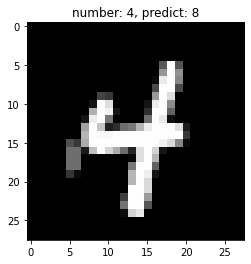

0: -0.11977
1: 0.01156
2: -0.16609
3: -0.20645
4: -0.27319
5: 0.04981
6: -0.01097
7: 0.08551
8: 0.14307
9: 0.10961


In [62]:
print_img = conv_ready_image.view(conv_ready_image.shape[2], -1)
plt.imshow(print_img, cmap="gray")
pred_digit = improved_mnist_res.detach().argmax()
plt.title(f'number: {trainset.targets[idx]}, predict: {pred_digit}')
plt.show()
for digit, pred in zip(range(10), *improved_mnist_res.detach()):
    print("{}: {:.5f}".format(digit, pred))

## **Class exercise build the LeNet architecture**

<img src = https://d2l.ai/_images/lenet.svg></img> 

**Architecture hyper parameters:**
* conv1: in channels: 1, out channels: 6, kernel size: 5
* pool1: kernel size: 2
* conv2: in channels: 6, out channels: 16, kernel size: 5
* pool2: kernel size: 2

* FC1: in channels: 256, out channels: 120 
* FC2: in channels: 120, out channels: 84
* FC3: in channels: 84, out channels: 10

In [63]:
# LeNet skeleton!
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5))
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5))
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        y = self.fc3(x)
        y = torch.sigmoid(y)
        return y

0: 0.47708
1: 0.48700
2: 0.46861
3: 0.48658
4: 0.50505
5: 0.45760
6: 0.48301
7: 0.50575
8: 0.49848
9: 0.50057


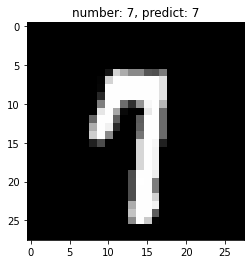

In [72]:
idx = np.random.randint(trainset.data.shape[0])

random_image = trainset.data[idx] / 255.
conv_ready_image = random_image[np.newaxis, np.newaxis, :]


lenet = LeNet()

res = lenet(conv_ready_image)
for digit, pred in zip(range(10), *res.detach()):
    print("{}: {:.5f}".format(digit, pred))

print_img = conv_ready_image.view(conv_ready_image.shape[2], -1)
plt.imshow(print_img, cmap="gray")
pred_digit = res.detach().argmax()
plt.title(f'number: {trainset.targets[idx]}, predict: {pred_digit}')
plt.show()